# Feature Selection Plot 

Let's implement here the code to obtain the Feature Selection plots as they were obtained in compare_feture_selection.py. 

The aim is to obtain a plot in which we see how the Average Precision of the different models (ExIFFI,DIFFI,Random Forest,Casual) changes as we reduce the number of features. Every time we remove the feature with the lowest importance score. 

In [1]:
import sys
import numpy as np
from datetime import datetime
import pandas as pd
import argparse
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sys.path.append('../')
from utils import *
from compare_features import *
from plot import *
from simulation_setup import *
from models import *
from models.Extended_IF import *
from models.Extended_DIFFI import *
from models.Extended_DIFFI_original import *
from feature_selection import *
import math
import seaborn as sns
sns.set()

import os
import pickle 
import scipy.io

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances')
os.getcwd()

'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances'

The files contained in the Importances folder contain a tuple with 3 DataFrames inside it: one for ExIFFI,one for DIFFI and one for ExIFFFI depth-based. Each DataFrame has the Global Importance Score sorted in decreasing order and the index column has the feature indexes sorted in decreasing order so that each Importance score is associated with the index of the feature that has that score. 

## N.B 

The code to create the importances files is in compare_features.py 

There is the function create_Importances_dict that creates a dictionary with importances and robustness (another metric that Alessio invented but then wasn't used) for DIFFI,EXIFFI,ExDIFFI (EXIFFI Depth Based). These dictionaries are contained in the Importances_dict folder. 

Then this dictionary is used as input for the make_importances_file function that is the one creating the importances files saved in the Importances folder. 

In the create_Importances_dict we compute the Global Importance Scores for a certain number of times (precision parameter in the function -> usually it is 10 times) for each model. With the make_importances_file we take the average score for each feature obtainining an average feature importance score vector for each model.

## NEW VERSION

Now with create_Importances_dict and make_importance_file we end up with 4 Importance scores vectors. In order EXIFFI,EXIFFI+,DIFFI and EDIFFI

In [13]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()

'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide'

In [15]:
file_to_read = open(os.getcwd()+'\\importances_wine', "rb")
loaded_dictionary = pickle.load(file_to_read)

## Create the Importances Files


# AUTOMATIC CREATION OF IMPORTANCES FILES

In [10]:
def csv_dataset(name, path = "../data/"):
    datapath = path + name + ".csv"
    data=pd.read_csv(datapath,index_col=0)
    if 'Unnamed: 0' in data.columns:
        data=data.drop(columns=['Unnamed: 0'])
    
    X=data[data.columns[data.columns!='Target']]
    y=data['Target']
    
    X,y = drop_duplicates(X,y)
    print(name, "\n")
    print_dataset_resume(X,y)
    
    return X,y

In [11]:
def importance_files(name):
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
    if name=='diabetes' or name=='moodify':
        X,y=csv_dataset(name,os.getcwd()+'\\')
    else:
        X,y=dataset(name,os.getcwd()+'\\')
    
    X,y=downsample(X,y)
    X_train,X_test=partition_data(X,y)
    X=np.r_[X_train,X_test]
    y_train=np.zeros(X_train.shape[0])
    y_test=np.ones(X_test.shape[0])
    y=np.concatenate([y_train,y_test])
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    imp,score=create_Importances_dict(300,10,256,X,X,y,name)
    make_importances_file(imp,name)

In [12]:
importance_files('diabetes')

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


100%|██████████| 10/10 [38:10<00:00, 229.10s/it]


### Wine

In [14]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
X,y=dataset('wine',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

wine 

[numero elementi = 129]
[percentage outliers = 0.07751937984496124]
[number features = 13]
[number outliers = 10]


In [5]:
N = X.shape[0]
dim = X.shape[1]
n_trees = 200
max_depth = 25
min_subsample = 1
subsample_size = min(N,max(int(N*1/10),200))
if subsample_size>200:
    n_trees=subsample_size
    subsample_size=200
if subsample_size==N:
    subsample_size = None
precision = 10
p = sum(y)/len(y)

In [8]:
X_test=np.r_[X_train,X_test]
imp_wine,score_wine=create_Importances_dict(200,10,None,X_train,X_test,y,'wine')
make_importances_file(imp_wine,'wine')

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [03:35<00:00, 21.57s/it]


In [9]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\wine.pkl', "rb")
wine_dict = pickle.load(file_to_read)

In [2]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_wine', "rb")
wine_imp = pickle.load(file_to_read)

### Annthyroid 

In [14]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('annthyroid',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

annthyroid 

[numero elementi = 7062]
[percentage outliers = 0.07561597281223449]
[number features = 6]
[number outliers = 534]
downsampled to 2500
(2500, 6)


In [15]:
X_test=np.r_[X_train,X_test]
imp_wine,score_wine=create_Importances_dict(200,10,None,X_train,X_test,y,'annthyroid')

100%|██████████| 10/10 [1:37:32<00:00, 585.28s/it]


In [16]:
imp_annthyroid=imp_wine
make_importances_file(imp_annthyroid,'annthyroid')

In [17]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\annthyroid.pkl', "rb")
annthyroid_dict = pickle.load(file_to_read)

In [18]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_annthyroid', "rb")
annthyroid_imp = pickle.load(file_to_read)

### Breastw

In [20]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('breastw',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

breastw 

[numero elementi = 449]
[percentage outliers = 0.5256124721603563]
[number features = 9]
[number outliers = 236]


In [21]:
X_test=np.r_[X_train,X_test]
imp_breastw,score_breastw=create_Importances_dict(200,10,None,X_train,X_test,y,'breastw')
make_importances_file(imp_breastw,'breastw')

100%|██████████| 10/10 [09:33<00:00, 57.37s/it]


In [22]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\breastw.pkl', "rb")
breastw_dict = pickle.load(file_to_read)

In [23]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_breastw', "rb")
breastw_imp = pickle.load(file_to_read)

### Pima 

In [25]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('pima',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

pima 

[numero elementi = 768]
[percentage outliers = 0.3489583333333333]
[number features = 8]
[number outliers = 268]


In [26]:
X_test=np.r_[X_train,X_test]
imp_pima,score_pima=create_Importances_dict(200,10,None,X_train,X_test,y,'pima')
make_importances_file(imp_pima,'pima')

100%|██████████| 10/10 [20:26<00:00, 122.61s/it]


In [27]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\pima.pkl', "rb")
pima_dict = pickle.load(file_to_read)

In [28]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_pima', "rb")
pima_imp = pickle.load(file_to_read)

### Cardio

In [4]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('cardio',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

cardio 

[numero elementi = 1822]
[percentage outliers = 0.09604829857299671]
[number features = 21]
[number outliers = 175]


In [5]:
X_test=np.r_[X_train,X_test]
imp_cardio,score_cardio=create_Importances_dict(200,10,None,X_train,X_test,y,'cardio')
make_importances_file(imp_cardio,'cardio')

100%|██████████| 10/10 [1:03:04<00:00, 378.40s/it]


In [6]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\cardio.pkl', "rb")
cardio_dict = pickle.load(file_to_read)

In [7]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_cardio', "rb")
cardio_imp = pickle.load(file_to_read)

### Ionosphere 

In [8]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('ionosphere',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

ionosphere 

[numero elementi = 350]
[percentage outliers = 0.35714285714285715]
[number features = 33]
[number outliers = 125]


In [9]:
X_test=np.r_[X_train,X_test]
imp_ionosphere,score_ionosphere=create_Importances_dict(200,10,None,X_train,X_test,y,'ionosphere')
make_importances_file(imp_ionosphere,'ionosphere')

100%|██████████| 10/10 [08:55<00:00, 53.60s/it]


In [10]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\ionosphere.pkl', "rb")
ionosphere_dict = pickle.load(file_to_read)

In [11]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_ionosphere', "rb")
ionosphere_imp = pickle.load(file_to_read)

### Glass 

In [12]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('glass',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

glass 

[numero elementi = 213]
[percentage outliers = 0.04225352112676056]
[number features = 9]
[number outliers = 9]


In [13]:
X_test=np.r_[X_train,X_test]
imp_glass,score_glass=create_Importances_dict(200,10,None,X_train,X_test,y,'glass')
make_importances_file(imp_glass,'glass')

100%|██████████| 10/10 [05:45<00:00, 34.58s/it]


In [14]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\glass.pkl', "rb")
glass_dict = pickle.load(file_to_read)

In [15]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_glass', "rb")
glass_imp = pickle.load(file_to_read)

### Pendigits 

In [20]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('pendigits',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

pendigits 

[numero elementi = 6870]
[percentage outliers = 0.022707423580786028]
[number features = 16]
[number outliers = 156]
downsampled to 2500
(2500, 16)


In [21]:
X_test=np.r_[X_train,X_test]
imp_pendigits,score_pendigits=create_Importances_dict(200,10,None,X_train,X_test,y,'pendigits')
make_importances_file(imp_pendigits,'pendigits')

100%|██████████| 10/10 [1:32:39<00:00, 555.99s/it]


In [22]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\pendigits.pkl', "rb")
pendigits_dict = pickle.load(file_to_read)

In [23]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_pendigits', "rb")
pendigits_imp = pickle.load(file_to_read)

### Shuttle 

In [24]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('shuttle',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

shuttle 

[numero elementi = 49097]
[percentage outliers = 0.0715114976475141]
[number features = 9]
[number outliers = 3511]
downsampled to 2500
(2500, 9)


In [25]:
X_test=np.r_[X_train,X_test]
imp_shuttle,score_shuttle=create_Importances_dict(200,10,None,X_train,X_test,y,'shuttle')
make_importances_file(imp_shuttle,'shuttle')

100%|██████████| 10/10 [1:23:42<00:00, 502.28s/it]


In [26]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\shuttle.pkl', "rb")
shuttle_dict = pickle.load(file_to_read)

In [27]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_shuttle', "rb")
shuttle_imp = pickle.load(file_to_read)

### Diabetes

In [28]:
def csv_dataset(name, path = "../data/"):
    datapath = path + name + ".csv"
    data=pd.read_csv(datapath,index_col=0)
    if 'Unnamed: 0' in data.columns:
        data=data.drop(columns=['Unnamed: 0'])
    
    X=data[data.columns[data.columns!='Target']]
    y=data['Target']
    
    X,y = drop_duplicates(X,y)
    print(name, "\n")
    print_dataset_resume(X,y)
    
    return X,y

In [29]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=csv_dataset('diabetes',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


In [30]:
X_test=np.r_[X_train,X_test]
imp_diabetes,score_diabetes=create_Importances_dict(200,10,None,X_train,X_test,y,'diabetes')
make_importances_file(imp_diabetes,'diabetes')

100%|██████████| 10/10 [1:18:55<00:00, 473.60s/it]


In [31]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\diabetes.pkl', "rb")
diabetes_dict = pickle.load(file_to_read)

In [32]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_diabetes', "rb")
diabetes_imp = pickle.load(file_to_read)

### Moodify

In [33]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=csv_dataset('moodify',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

moodify 

[numero elementi = 276260]
[percentage outliers = 0.1527112140736987]
[number features = 11]
[number outliers = 42188]
downsampled to 2500
(2500, 11)


In [34]:
X_test=np.r_[X_train,X_test]
imp_moodify,score_moodify=create_Importances_dict(200,10,None,X_train,X_test,y,'moodify')
make_importances_file(imp_moodify,'moodify')

100%|██████████| 10/10 [1:26:05<00:00, 516.55s/it]


In [35]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_dict_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\moodify.pkl', "rb")
moodify_dict = pickle.load(file_to_read)

In [36]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_moodify', "rb")
moodify_imp = pickle.load(file_to_read)

# HOW TO PLOT THE FEATURE SELECTION PLOT 

All the functions needed to create the plot are contained in feature_selection.py.

The first function to consider is compute_feature_selection that requires in input the importances file that I just created in the cells above and also the type of algorithm (ExIFFI,DIFFI,EDIFFI) and it creates a Precision Dict with the Average Precision of all the model with different set of features. We can also use casual in the feature_ranking_algorithm parameter to perform the casual feature selection. This precisions files are contained in the path: 'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\feature_selection\\results\\Precisions'. In this folder we have the Average Precision for 10 executions of the model for each set of features considered (so for example in the case of Annthyroid (that has 6 features) there are 6 arrays (for the 6 set of features considered) with 10 Average Precision values resulting from 10 different executions of the model). 

The function open_precisions is used to load the pkl file we ave created since we will need it to run the plot_featsel function. 

The plot_featsel function is the one doing the plot and it requires the dict with all the precisions, the name of the dataset and the pwd (path used to save the final image). 


QUESTION FOR ALESSIO

In compute_feature_selection in the else statement we use the feature ranking given by the different models (E-IFFI,E-DIFFI,DIFFI,Random Forest) just to select every time the set of features to use but then the precision is always computed fitting an EIF model to current training set (with the current set of features). Why? Why not using IF for DIFFI and RF for RF model? 



In [2]:
def partition_data(X,y):
    inliers=X[y==0,:]
    outliers=X[y==1,:]
    return inliers,outliers

# AUTOMATIC PLOT FEATSEL FUNCTION

In [4]:
def obtain_featsel(name):
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
    if name=='diabetes' or name=='moodify':
        X,y=csv_dataset(name,os.getcwd()+'\\')
    else:
        X,y=dataset(name,os.getcwd()+'\\')
        
    X,y=downsample(X,y)
    X_train,X_test=partition_data(X,y)
    X=np.r_[X_train,X_test]
    y_train=np.zeros(X_train.shape[0])
    y_test=np.ones(X_test.shape[0])
    y=np.concatenate([y_train,y_test])
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    # Importances No Split
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
    file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
    loaded_file=pickle.load(file_to_read)
    importances_e_diffi,importances_e_diffi_plus,importances_diffi=loaded_file[:3]
    importances_random_forest = Random_Forest_Feature_importance_scaled(name)

    # Importances Split
    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide_split')
    file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
    loaded_file_split=pickle.load(file_to_read)
    importances_e_diffi_split,importances_e_diffi_plus_split=loaded_file_split[:2]

    importances_dict={
                        'EXIFFI':importances_e_diffi,
                        'EXIFFI-split':importances_e_diffi_split,
                        'EXIFFI-plus':importances_e_diffi_plus,
                        'EXIFFI-plus-split':importances_e_diffi_plus_split,
                        "DIFFI":importances_diffi,
                        "random_forest":importances_random_forest,
                        "casual":None}
    
    dim=X.shape[1]
    precision=10
    n_trees=300
    for alg_name in importances_dict.keys():
        compute_feature_selection(importances_dict,dim,X,X,y,y,precision,n_trees,name,alg_name)

    Precision_dict = {}
    for feature_ranking_algorithm in importances_dict.keys():
        precisions = open_precisions(name,feature_ranking_algorithm)
        Precision_dict[feature_ranking_algorithm] = precisions

    os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
    pwd=os.getcwd()
    plot_featsel(Precision_dict, name, pwd)
    

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


100%|██████████| 4/4 [01:20<00:00, 20.07s/it]


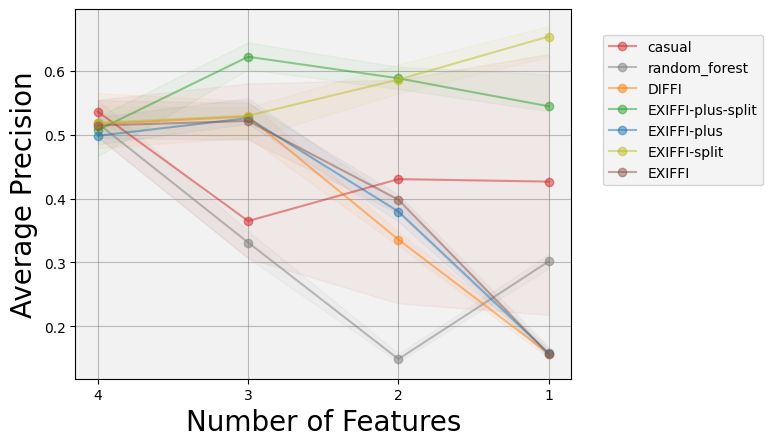

In [13]:
obtain_featsel('diabetes')

## Annthyroid

In [2]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('annthyroid',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

annthyroid 

[numero elementi = 7062]
[percentage outliers = 0.07561597281223449]
[number features = 6]
[number outliers = 534]
downsampled to 2500
(2500, 6)


In [3]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_annthyroid', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('annthyroid')
importances_dict_annthyroid={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [4]:
dim=X.shape[1]
precision=10
n_trees=200

In [6]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_annthyroid.keys():
    compute_feature_selection(importances_dict_annthyroid,dim,X_test,X_train,y,y_train,precision,n_trees,'annthyroid',name)

  0%|          | 0/6 [00:00<?, ?it/s]c:\Users\lemeda98\Desktop\PHD Information Engineering\ExIFFI\ExIFFI\utils\..\models\forests.py:18: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  d = np.dot(x,normals[node_id])
100%|██████████| 6/6 [02:04<00:00, 20.77s/it]


In [5]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_annthyroid.keys():
    precisions = open_precisions('annthyroid',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolors'

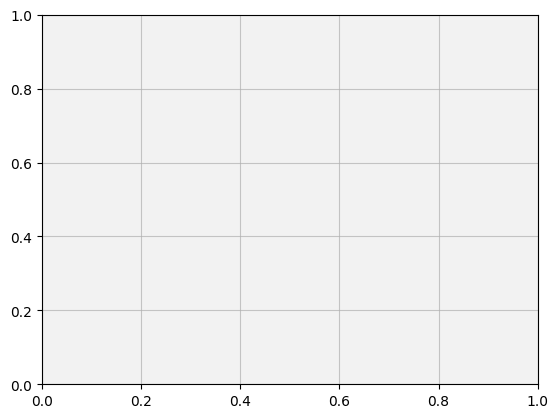

In [6]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict, 'annthyroid', pwd)

## Wine 

In [ ]:
name='wine'
# Importances No Split
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
loaded_file=pickle.load(file_to_read)
importances_e_diffi,importances_e_diffi_plus,importances_diffi=loaded_file[:3]
importances_random_forest = Random_Forest_Feature_importance_scaled(name)

# Importances Split
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide_split')
file_to_read = open(os.getcwd()+'\\importances_'+name, "rb")
loaded_file_split=pickle.load(file_to_read)
importances_e_diffi_split,importances_e_diffi_plus_split=loaded_file_split[:2]

importances_dict={
                    'EXIFFI':importances_e_diffi,
                    'EXIFFI-split':importances_e_diffi_split,
                    'EXIFFI-plus':importances_e_diffi_plus,
                    'EXIFFI-plus-split':importances_e_diffi_plus_split,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

Precision_dict = {}
for feature_ranking_algorithm in importances_dict.keys():
    precisions = open_precisions(name,feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

pwd='c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI'
plot_featsel(Precision_dict, name, pwd)


In [152]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('wine',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

wine 

[numero elementi = 129]
[percentage outliers = 0.07751937984496124]
[number features = 13]
[number outliers = 10]


In [21]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_wine', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('wine')
importances_dict_wine={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [22]:
dim=X.shape[1]
precision=10
n_trees=200

In [18]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_wine.keys():
    compute_feature_selection(importances_dict_wine,dim,X_test,X_train,y,y_train,precision,n_trees,'wine',name)

100%|██████████| 13/13 [02:10<00:00, 10.05s/it]


In [23]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_wine.keys():
    precisions = open_precisions('wine',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

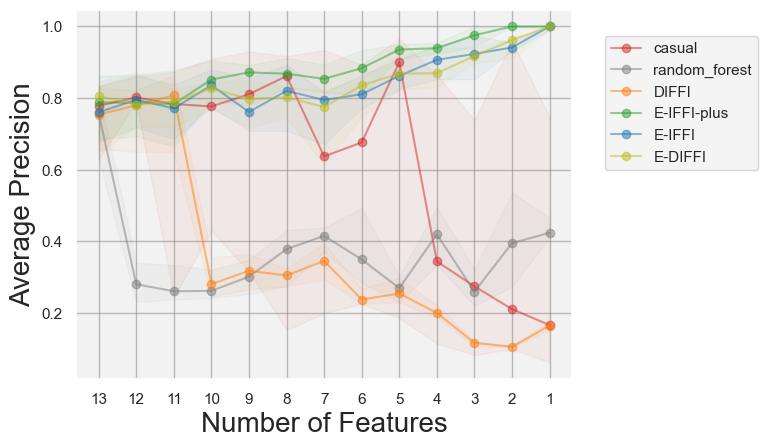

In [24]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict, 'wine', pwd)

In [9]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('wine',os.getcwd()+'\\')
X,y=downsample(X,y)

wine 

[numero elementi = 129]
[percentage outliers = 0.07751937984496124]
[number features = 13]
[number outliers = 10]


## Breastw

In [25]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('breastw',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

breastw 

[numero elementi = 449]
[percentage outliers = 0.5256124721603563]
[number features = 9]
[number outliers = 236]


In [26]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_breastw', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('breastw')
importances_dict_breastw={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [27]:
dim=X.shape[1]
precision=10
n_trees=300

In [12]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_breastw.keys():
    compute_feature_selection(importances_dict_breastw,dim,X_test,X_train,y,y_train,precision,n_trees,'breastw',name)

100%|██████████| 9/9 [01:50<00:00, 12.31s/it]


In [28]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_breastw.keys():
    precisions = open_precisions('breastw',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

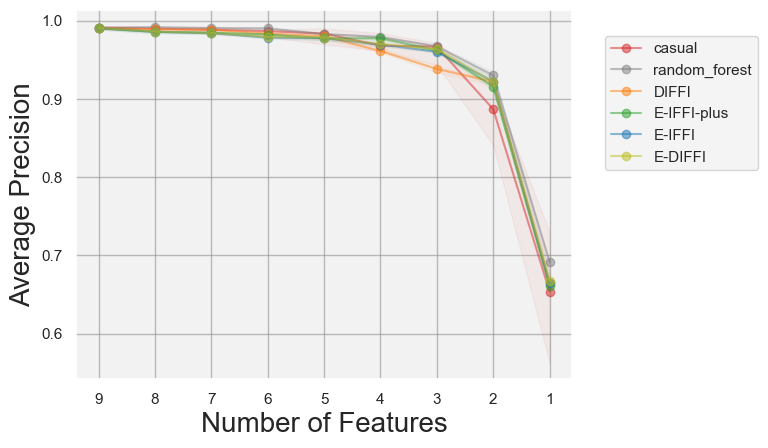

In [29]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict, 'breastw', pwd)

## Pima 

In [30]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('pima',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

pima 

[numero elementi = 768]
[percentage outliers = 0.3489583333333333]
[number features = 8]
[number outliers = 268]


In [31]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_pima', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('pima')
importances_dict_pima={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [32]:
dim=X.shape[1]
precision=10
n_trees=200

In [18]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_pima.keys():
    compute_feature_selection(importances_dict_pima,dim,X_test,X_train,y,y_train,precision,n_trees,'pima',name)

100%|██████████| 8/8 [01:54<00:00, 14.27s/it]


In [33]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_pima.keys():
    precisions = open_precisions('pima',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

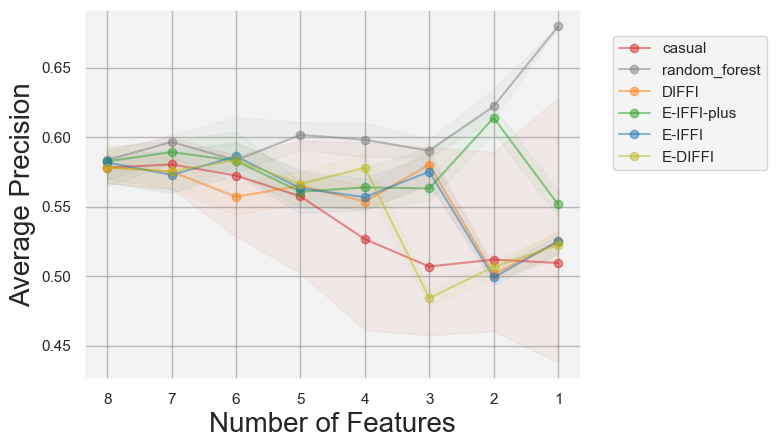

In [34]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'pima',pwd)

## Cardio

In [143]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('cardio',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

cardio 

[numero elementi = 1822]
[percentage outliers = 0.09604829857299671]
[number features = 21]
[number outliers = 175]


In [36]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_cardio', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('cardio')
importances_dict_cardio={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [37]:
dim=X.shape[1]
precision=10
n_trees=200

In [24]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_cardio.keys():
    compute_feature_selection(importances_dict_cardio,dim,X_test,X_train,y,y_train,precision,n_trees,'cardio',name)

100%|██████████| 21/21 [06:08<00:00, 17.57s/it]


In [38]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_cardio.keys():
    precisions = open_precisions('cardio',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

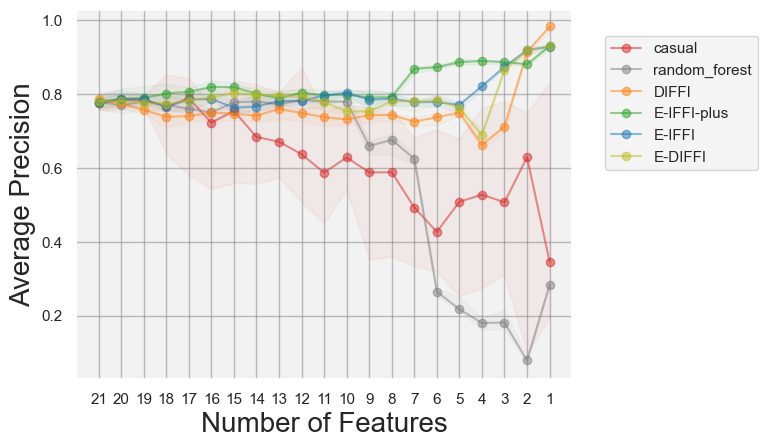

In [39]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'cardio',pwd)

## Ionosphere

In [40]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('ionosphere',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

ionosphere 

[numero elementi = 350]
[percentage outliers = 0.35714285714285715]
[number features = 33]
[number outliers = 125]


In [41]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_ionosphere', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('ionosphere')
importances_dict_ionosphere={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [42]:
dim=X.shape[1]
precision=10
n_trees=200

In [5]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_ionosphere.keys():
    compute_feature_selection(importances_dict_ionosphere,dim,X_test,X_train,y,y_train,precision,n_trees,'ionosphere',name)

  0%|          | 0/33 [00:00<?, ?it/s]c:\Users\lemeda98\Desktop\PHD Information Engineering\ExIFFI\ExIFFI\utils\..\models\forests.py:18: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  d = np.dot(x,normals[node_id])
100%|██████████| 33/33 [05:46<00:00, 10.50s/it]


In [43]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_ionosphere.keys():
    precisions = open_precisions('ionosphere',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

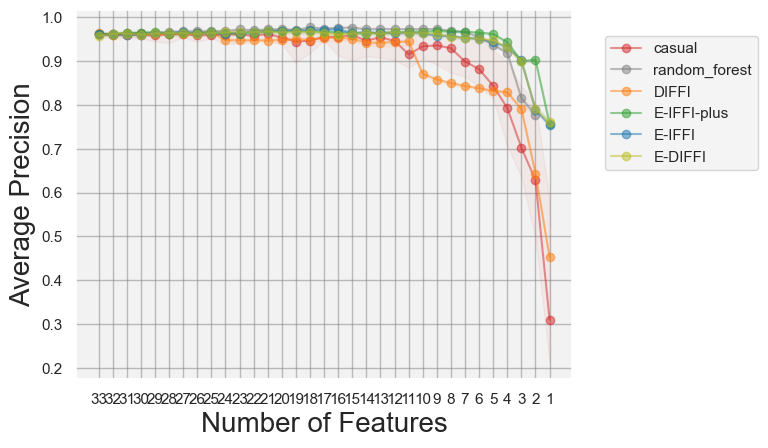

In [44]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'ionosphere',pwd)

## Glass 

In [45]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('glass',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

glass 

[numero elementi = 213]
[percentage outliers = 0.04225352112676056]
[number features = 9]
[number outliers = 9]


In [46]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_glass', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('glass')
importances_dict_glass={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [47]:
dim=X.shape[1]
precision=10
n_trees=200

In [11]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_glass.keys():
    compute_feature_selection(importances_dict_glass,dim,X_test,X_train,y,y_train,precision,n_trees,'glass',name)

100%|██████████| 9/9 [01:16<00:00,  8.52s/it]


In [48]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_glass.keys():
    precisions = open_precisions('glass',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

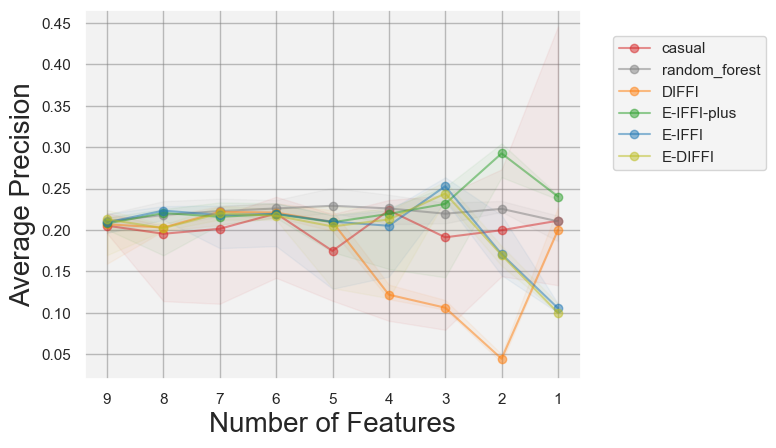

In [49]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'glass',pwd)

## Pendigits

In [50]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('pendigits',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

pendigits 

[numero elementi = 6870]
[percentage outliers = 0.022707423580786028]
[number features = 16]
[number outliers = 156]
downsampled to 2500
(2500, 16)


In [51]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_pendigits', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('pendigits')
importances_dict_pendigits={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [52]:
dim=X.shape[1]
precision=10
n_trees=200

In [17]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_pendigits.keys():
    compute_feature_selection(importances_dict_pendigits,dim,X_test,X_train,y,y_train,precision,n_trees,'pendigits',name)

100%|██████████| 16/16 [05:47<00:00, 21.70s/it]


In [53]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_pendigits.keys():
    precisions = open_precisions('pendigits',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

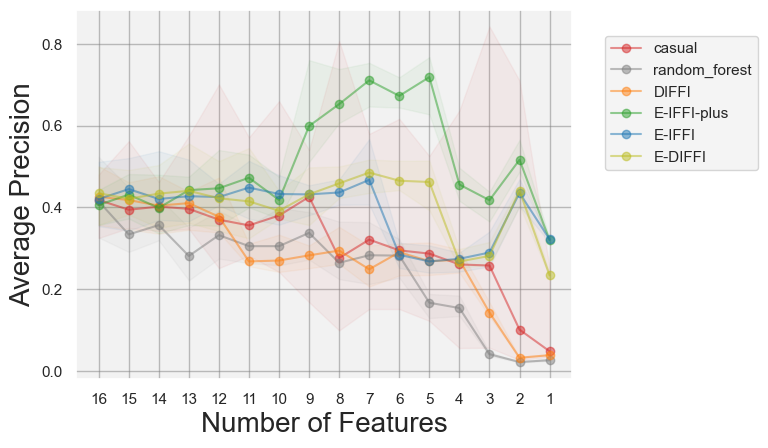

In [54]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'pendigits', pwd)

## Shuttle

In [165]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=dataset('shuttle',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

shuttle 

[numero elementi = 49097]
[percentage outliers = 0.0715114976475141]
[number features = 9]
[number outliers = 3511]
downsampled to 2500
(2500, 9)


In [56]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_shuttle', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('shuttle')
importances_dict_shuttle={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [57]:
dim=X.shape[1]
precision=10
n_trees=200

In [23]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_shuttle.keys():
    compute_feature_selection(importances_dict_shuttle,dim,X_test,X_train,y,y_train,precision,n_trees,'shuttle',name)

100%|██████████| 9/9 [02:08<00:00, 14.32s/it]


In [58]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_shuttle.keys():
    precisions = open_precisions('shuttle',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

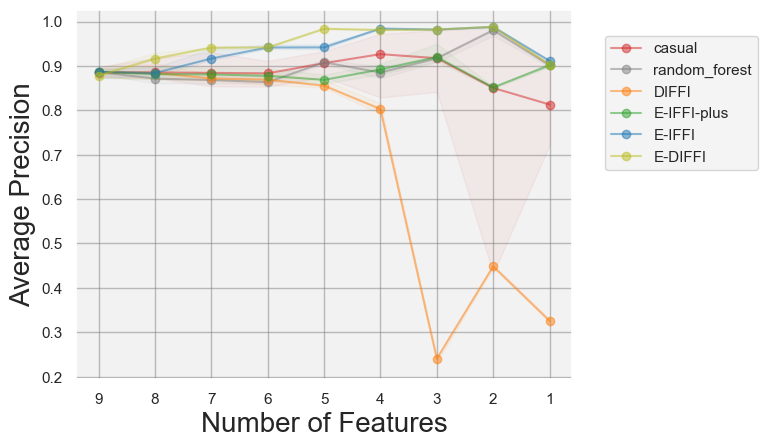

In [59]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'shuttle', pwd)

## Diabetes

In [157]:
def csv_dataset(name, path = "../data/"):
    datapath = path + name + ".csv"
    data=pd.read_csv(datapath,index_col=0)
    if 'Unnamed: 0' in data.columns:
        data=data.drop(columns=['Unnamed: 0'])
    
    X=data[data.columns[data.columns!='Target']]
    y=data['Target']
    
    X,y = drop_duplicates(X,y)
    print(name, "\n")
    print_dataset_resume(X,y)
    
    return X,y

In [172]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=csv_dataset('diabetes',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

diabetes 

[numero elementi = 85916]
[percentage outliers = 0.096582708692211]
[number features = 4]
[number outliers = 8298]
downsampled to 2500
(2500, 4)


In [62]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_diabetes', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('diabetes')
importances_dict_diabetes={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [63]:
dim=X.shape[1]
precision=10
n_trees=200

In [30]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_diabetes.keys():
    compute_feature_selection(importances_dict_diabetes,dim,X_test,X_train,y,y_train,precision,n_trees,'diabetes',name)

100%|██████████| 4/4 [00:58<00:00, 14.53s/it]


In [64]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_diabetes.keys():
    precisions = open_precisions('diabetes',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

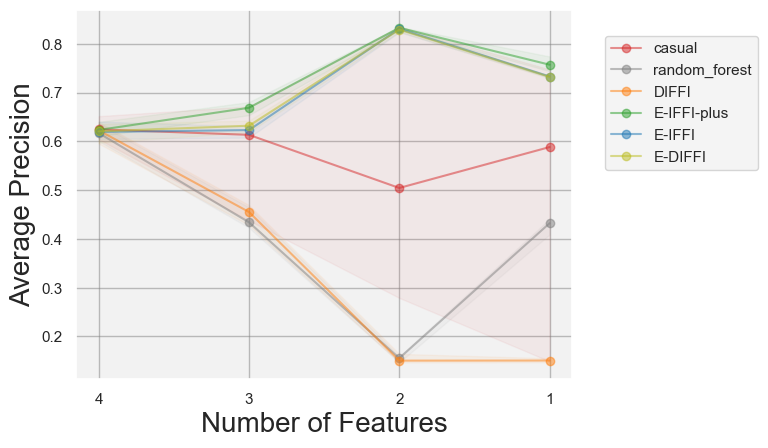

In [65]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'diabetes', pwd)

## Moodify

In [66]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data')
os.getcwd()
X,y=csv_dataset('moodify',os.getcwd()+'\\')
X,y=downsample(X,y)
X_train,X_test=partition_data(X,y)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=np.zeros(shape=X_train.shape[0])
y_test=np.ones(shape=X_test.shape[0])
y=np.concatenate([y_train,y_test])

moodify 

[numero elementi = 276260]
[percentage outliers = 0.1527112140736987]
[number features = 11]
[number outliers = 42188]
downsampled to 2500
(2500, 11)


In [67]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\results\\compare_features\\results\\Importances_davide')
os.getcwd()
file_to_read = open(os.getcwd()+'\\importances_moodify', "rb")
importances_e_diffi,importances_e_diffi_plus,importances_diffi,importances_ediffi_depth = pickle.load(file_to_read)
importances_random_forest = Random_Forest_Feature_importance('moodify')
importances_dict_moodify={"E-DIFFI":importances_ediffi_depth,
                    'E-IFFI':importances_e_diffi,
                    'E-IFFI-plus':importances_e_diffi_plus,
                    "DIFFI":importances_diffi,
                    "random_forest":importances_random_forest,
                    "casual":None}

In [68]:
dim=X.shape[1]
precision=10
n_trees=200

In [7]:
X_test=np.r_[X_train,X_test]
for name in importances_dict_moodify.keys():
    compute_feature_selection(importances_dict_moodify,dim,X_test,X_train,y,y_train,precision,n_trees,'moodify',name)

  0%|          | 0/11 [00:00<?, ?it/s]

c:\Users\lemeda98\Desktop\PHD Information Engineering\ExIFFI\ExIFFI\utils\..\models\forests.py:18: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  d = np.dot(x,normals[node_id])
100%|██████████| 11/11 [04:02<00:00, 22.07s/it]


In [69]:
Precision_dict = {}
for feature_ranking_algorithm in importances_dict_moodify.keys():
    precisions = open_precisions('moodify',feature_ranking_algorithm)
    Precision_dict[feature_ranking_algorithm] = precisions

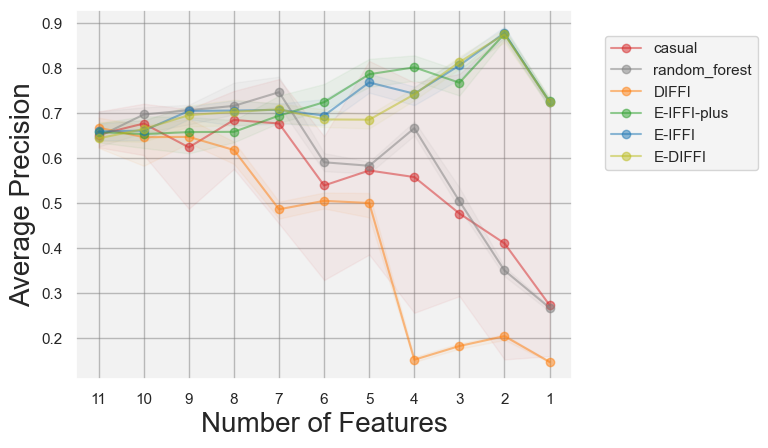

In [70]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
plot_featsel(Precision_dict,'moodify',pwd)

# CHECK 

## Plot Functions 

In [3]:
def plt_importances_bars(importances, name, pwd, dim, f = 6):
    
    if 'GFI_' not in name:
        name='LFI_'+name

    
    number_colours = 20
    color = plt.cm.get_cmap('tab20',number_colours).colors
    patterns = [None, "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    importances_matrix = np.array([np.array(pd.Series(x).sort_values(ascending = False).index).T for x in importances])
    bars = [[(list(importances_matrix[:,j]).count(i)/len(importances_matrix))*100 for i in range(dim)] for j in range(dim)]
    
    bars = pd.DataFrame(bars)
    display(bars)

    tick_names=[]
    for i in range(1,f+1):
        if i==1:
            tick_names.append(r'${}'.format(i) + r'^{st}$')
        elif i==2:
            tick_names.append(r'${}'.format(i) + r'^{nd}$')
        elif i==3:
            tick_names.append(r'${}'.format(i) + r'^{rd}$')
        else:
            tick_names.append(r'${}'.format(i) + r'^{th}$')

    barWidth = 0.85
    r=range(dim)
 
    for i in range(dim):
        plt.bar(r[:f], bars.T.iloc[i,:f].values, bottom=bars.T.iloc[:i,:f].sum().values ,color=color[i%number_colours], edgecolor='white', width=barWidth, label=str(i), hatch=patterns[i//number_colours])


    plt.xlabel("Rank", fontsize = 20)
    #plt.xticks(range(f),[r'$1^{st}$', r'$2^{nd}$', r'$3^{rd}$', r'$4^{th}$', r'$5^{th}$', r'$6^{th}$', r'$7^{th}$', r'$8^{th}$', r'$9^{th}$'][:f])
    plt.xticks(range(f),tick_names[:f])
    plt.ylabel("Percentage count", fontsize = 20)
    plt.yticks(range(10,101,10),[str(x)+"%" for x in range(10,101,10)])
    #plt.title("synthetic {} anomalies E-diffi \n percentage count of feature ranking".format(name,f), fontsize = 18)
    plt.legend(bbox_to_anchor = (1.05,0.95),loc="upper left")
    #plt.savefig(pwd+'/results_local_diffi/images/'+name+'.pdf',bbox_inches = "tight")
    #current_time=datetime.now()
    #tm=[current_time.day,current_time.month,current_time.year,
    #current_time.hour,current_time.minute,current_time.second]
    plt.savefig(pwd+'//results//davide/{}_synt.pdf'
                .format(name),bbox_inches='tight')
    plt.show()

In [4]:
def plt_feat_bar_plot(global_importances,X,name,pwd,f=6,save=True):
    
    name_file='Feat_bar_plot_'+name 
    patterns = [None, "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    imp_vals=global_importances['Importances']

    feat_imp=pd.DataFrame({'Global Importance': np.round(imp_vals,3),
                          'Feature': global_importances['feat_order'],
                          'std': global_importances['std']
                          })

    if len(feat_imp)>15:
        feat_imp=feat_imp.iloc[-15:].reset_index(drop=True)
    
    dim=feat_imp.shape[0]

    number_colours = 20

    plt.style.use('default')
    plt.rcParams['axes.facecolor'] = '#F2F2F2'
    plt.rcParams['axes.axisbelow'] = True
    #plt.grid(alpha = 0.7)
    color = plt.cm.get_cmap('tab20',number_colours).colors
    ax1=feat_imp.plot(y='Global Importance',x='Feature',kind="barh",color=color[feat_imp['Feature']%number_colours],xerr='std',
                     capsize=5, alpha=1,legend=False,
                     hatch=[patterns[i//number_colours] for i in feat_imp['Feature']])

    barWidth=0.85

    xlim=np.min(imp_vals)-0.2*np.min(imp_vals)

    text_x=np.max(feat_imp['Global Importance'] + feat_imp['std'])*1.1

    ax1.grid(alpha=0.7)
    ax2 = ax1.twinx()
    # Add labels on the right side of the bars
    values=[]
    for i, v in enumerate(feat_imp['Global Importance']):
        #ax2.text(v + 1, i, str(v) + ' +- ' + str(np.round(feat_imp['std'][i],2)), color='blue', va='center')
        values.append(str(v) + ' +- ' + str(np.round(feat_imp['std'][i],2)))
    
    #print(values)
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(range(dim))
    ax2.set_yticklabels(values)
    ax2.grid(alpha=0)

    #for i, v in enumerate(feat_imp['Global Importance']):
        #ax.text(text_x,i-0.2,str(v)+' +- ' + str(np.round(feat_imp['std'][i],2)), ha='center', va='bottom')

    plt.axvline(x=0, color=".5")
    ax1.set_xlabel('Importance Score',fontsize=20)
    ax1.set_ylabel('Features',fontsize=20)
    plt.xlim(xlim)
    #plt.yticks(range(dim),feat_imp['Feature'])
    plt.subplots_adjust(left=0.3)
    if save:
        plt.savefig(pwd+'//results//davide/{}.pdf'.format(name_file),bbox_inches='tight')
        
    plt.show()


## Plots

In [8]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
os.getcwd()

'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI'

No Split

In [9]:
name='bimodal'

path = os.getcwd() + '\\results\\davide\\Importance_Scores\\Imp Score\\imp_score_GFI_' + name + '.pkl'
with open(path, 'rb') as f:
    imp= pickle.load(f)

path = os.getcwd() + '\\results\\davide\\Importance_Scores\\Plt Data\\plt_data_GFI_' + name + '.pkl'
with open(path, 'rb') as f:
    plt_data= pickle.load(f)

Split

In [175]:
name='diabetes'

path = os.getcwd() + '\\results\\davide\\Importance_Scores\\Imp Score\\imp_score_GFI_' + name + '_split.pkl'
with open(path, 'rb') as f:
    imp_split= pickle.load(f)

path = os.getcwd() + '\\results\\davide\\Importance_Scores\\Plt Data\\plt_data_GFI_' + name + '_split.pkl'
with open(path, 'rb') as f:
    plt_data_split= pickle.load(f)

In [12]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data\\diffi_data')
os.getcwd()
file_to_read = open(os.getcwd()+'\\toy_datasets.pkl', "rb")
loaded_dictionary = pickle.load(file_to_read)
X_toy_2d,X_toy_3d,X_toy_4d,X_toy_6d,y = loaded_dictionary['X_toy_2d'],loaded_dictionary['X_toy_3d'],loaded_dictionary['X_toy_4d'],loaded_dictionary['X_toy_6d'],loaded_dictionary['y']
X_toy_2d=X_toy_2d[:,:2]
X_toy_2d.shape

(400, 2)

In [13]:
X_train,X_test=partition_data(X_toy_2d,y)
X_train.shape,X_test.shape

((390, 2), (10, 2))

No Split

,0,1
0,20.0,80.0
1,80.0,20.0


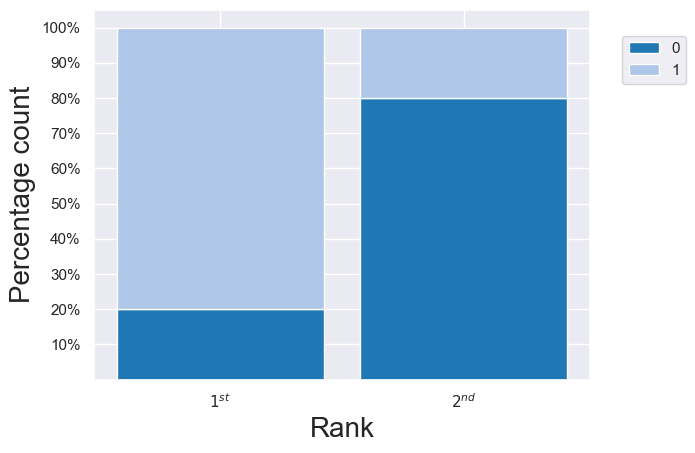

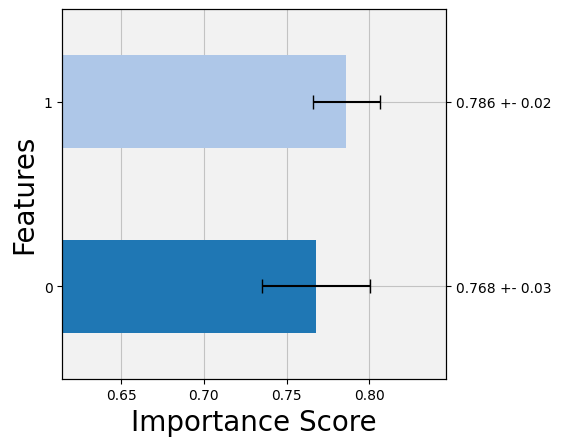

In [14]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
dim=2
plt_importances_bars(imp,name,pwd,dim,f=dim)
plt_feat_bar_plot(plt_data,X_train,name,pwd,f=dim)

Split

,0,1,2,3
0,0.0,0.0,40.0,60.0
1,0.0,0.0,60.0,40.0
2,10.0,90.0,0.0,0.0
3,90.0,10.0,0.0,0.0


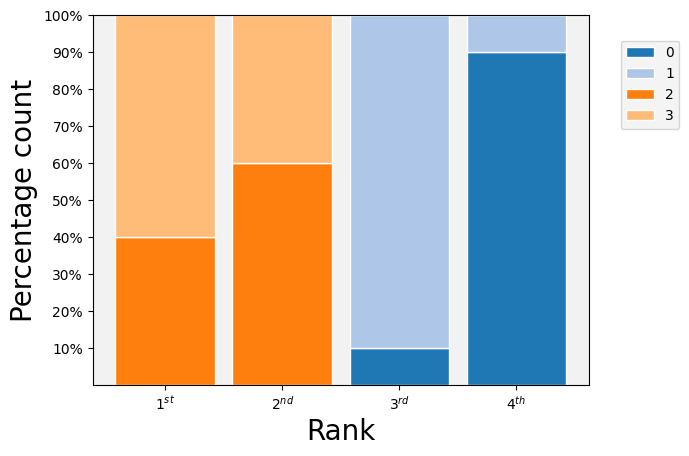

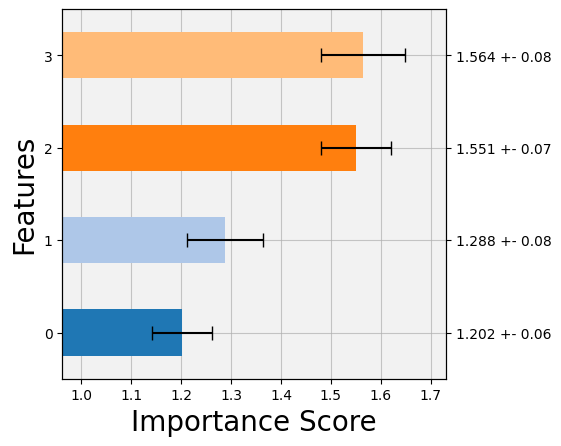

In [176]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI')
pwd=os.getcwd()
dim=X.shape[1]
plt_importances_bars(imp_split,name+'_split',pwd,dim,f=dim)
plt_feat_bar_plot(plt_data_split,X,name+'_split',pwd,f=dim)